# Assignment Applied Machine Learning BSc IK 

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: **alleen de hoofdletter** (iets als  `A` of `B` dus)

__Namen__: Basten Leeftink

__Emails__: basten@dds.nl

__Student ids__ : 14025361

__Groep__ : VervangMijDoorEenHoofdletter

## Toelichting

* Een aantal opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Applied Machine Learning W5

In this week's assignment we will be zooming in on one of the cornerstones of Machine Learning: Gradient Descent. We have set up a few exercises that should get you familiar with how gradient descent works and how different loss functions effect the outcome of the algorithm. The rest of the exercises will be focussed on getting more familiar with linear regression. The asssignment consists of 4 subquestions, for a total number of 13 points.


## Subquestions
- 1.1 [Gradient Descent](#grad1) <br>
- 1.2 [Gradient Descent on the Tips dataset](#grad2) <br>
- 2. [Linear Regression](#linreg1) <br>
   - 2.1.[The Titanic Dataset and Scaling](#linreg_intro)
   - 2.3 [Cross Validation](#crossval) <br>
   - 2.4 [Grid Search](#gridsearch)

In [1]:
import os
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from typing import Tuple
from scipy.stats import mode
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# testing
from numpy.testing import *
from pandas.testing import assert_frame_equal
from nose.tools import assert_count_equal, assert_equal, assert_almost_equals

# Please do not remove this: 
np.random.seed(31415)

<a id="grad1" />

# Q1  Gradient descent

Do the exercise in the one but last slide of this week, related to the function $f(x,y)$ given there.

![](../../data/Week5/gd1.png)
1. Find the minimum analytically, by putting the two partial derivatives to 0 and solve for $x$ and $y$. You find a lot of possible value pairs, but most are spurious. Explain why they are spurious, and give the real answer(s).
2. Find the minimum using the gradient descent algorithm, using these two partial derivatives. In the slides you find the update step. Program it.  Add a while loop in whichn you check that either you have reached your maximum number of allowed steps (a hyperparameter of course), or $x$ and $y$ make the function go up after following the gradient (i.e., you are in a minumum). 
3. Experiment with the learning rate, and tabulate the learning rate against the number of steps, and explain what is going on. Also make the learning rate really large so you jump over the minimum. Not only give a nice table (or graphic, also explain what you have learned from about the size of the learning rate.

First find the minimum analytically, and try to explain how you did this, and how you removed the spurious answers.

YOUR ANSWER HERE

We will start by implementing the function `f` itself, and two two functions that take the partial derivatives with respect to x and y, in `df_dx` and `df_dy` respectively.

In [14]:
# First, let us define our function and its partial derivatives
# Fill in the functions below

def f(x,y) -> float:
    '''
    Function that implements the function f from above, returning a float
    '''
    return 85 - (1/90)*x**2*(x-6)*y**2*(y-6)

def df_dx(x, y) -> float:
    '''
    Function that returns the partial derivative of f with respect to x, returning a float
    '''
    return -(1/90) * x * (3 * x - 12) * y**2 * (y - 6)

def df_dy(x, y) -> float:
    '''
    Function that returns the partial derivative of f with respect to x, returning a float
    '''
    return -(1/90) * x**2 * (x - 6) * y* (3 * y - 12)
df_dy(1.5, 3.0)

-1.0125000000000002

In [15]:
assert_equal(type(f(1.5, 3.0)), float)
assert_equal(type(df_dx(1.5, 3.0)), float)
assert_equal(type(df_dy(1.5, 3.0)), float)

After we have implemented these partial derivatives we will now implement the gradient descent algorithm that will, given a learning rate and a maximum number of steps compute the optimal values for x and y. Fill in the function below.

In [187]:
# To help you along, first implement one step of the gradient descent algorithm in the function `gradient_step` below
# using your df_dx and df_dy functions. The function should return a tuple with the new values for x and y
def gradient_step(x, y, learning_rate) -> Tuple[float, float]:
    #WRITE YOUR CODE HERE
    gradient_x = df_dx(x,y)
    gradient_y = df_dy(x,y)

    return (x - learning_rate * gradient_x, y - learning_rate * gradient_y)
gradient_step(0.6, 0.5, 0.02)

(0.60187, 0.502268)

In [26]:
assert_equal(type(gradient_step(0.6, 0.5, 0.01)), tuple)
assert_equal(type(gradient_step(0.6, 0.5, 0.01)[0]), float)
assert_equal(type(gradient_step(0.6, 0.5, 0.01)[1]), float)

Finally, implement the complete `gradient_descent` algorithm, where you use the function `gradient_step` that you have defined previously. As starting values for x and y, use 0.6 and 0.5 respectively.

In [188]:
def gradient_descent(learning_rate, max_num_steps)->Tuple[float, float]:
    """
    This function implements the gradient descent algorithm for the function f
    defined above, given a float learning_rate and an integer max_num_steps.
    You can use the functions f, df_dx and df_dy that you created above.
    The function should return a tuple containing the optimal x value and the optimal
    y value.
    """
    steps = 0
    # we will give you some starting values for x and y
    x, y = 0.6, 0.5
    #WRITE YOUR CODE HERE
    for _ in range(max_num_steps):
        f1 = f(x,y)
        
        x, y = gradient_step(x,y, learning_rate)
        print(x,y)
        f2 = f(x,y)
        
        steps += 1
        
        if f2 > f1:
            break
    print(steps)
    return (x, y, steps)

gradient_descent(0.001, 10000)

0.6000935 0.5001134
0.6001870524916966 0.5002268554322576
0.6002806575190943 0.5003403663419012
0.6003743151262472 0.5004539327741091
0.6004680253572592 0.5005675547741107
0.6005617882562841 0.5006812323871859
0.6006556038675258 0.500794965658665
0.6007494722352381 0.5009087546339293
0.600843393403725 0.5010225993584109
0.6009373674173404 0.5011364998775929
0.6010313943204889 0.5012504562370091
0.6011254741576252 0.5013644684822448
0.6012196069732543 0.5014785366589359
0.6013137928119318 0.5015926608127698
0.6014080317182636 0.501706840989485
0.6015023237369067 0.5018210772348716
0.6015966689125682 0.5019353695947708
0.6016910672900064 0.5020497181150756
0.6017855189140301 0.5021641228417302
0.6018800238294991 0.5022785838207307
0.6019745820813244 0.5023931010981247
0.6020691937144677 0.5025076747200119
0.6021638587739419 0.5026223047325434
0.6022585773048111 0.5027369911819226
0.602353349352191 0.5028517341144046
0.602448174961248 0.5029665335762968
0.6025430541772004 0.50308138961395

0.7057713244161367 0.6240862723451224
0.7059335943456976 0.6242714742411566
0.7060959843356084 0.6244568004465908
0.7062584945195716 0.6246422510971583
0.7064211250314887 0.6248278263287931
0.7065838760054606 0.6250135262776298
0.706746747575788 0.6251993510800047
0.7069097398769717 0.6253853008724551
0.707072853043713 0.6255713757917207
0.7072360872109141 0.6257575759747434
0.7073994425136784 0.6259439015586676
0.7075629190873107 0.6261303526808413
0.7077265170673183 0.6263169294788155
0.7078902365894103 0.6265036320903451
0.7080540777894989 0.6266904606533895
0.7082180408036993 0.6268774153061125
0.7083821257683302 0.6270644961868829
0.7085463328199141 0.6272517034342747
0.7087106620951777 0.627439037187068
0.7088751137310526 0.6276264975842485
0.7090396878646751 0.6278140847650088
0.709204384633387 0.6280017988687482
0.7093692041747358 0.6281896400350732
0.7095341466264752 0.628377608403798
0.7096992121265654 0.628565704114945
0.7098644008131736 0.6287539273087446
0.7100297128246741

0.8459942562882338 0.7803466600941829
0.846276956056215 0.7806555865927812
0.8465599321270072 0.7809647953357282
0.8468431849041197 0.7812742867297183
0.8471267147918344 0.7815840611822207
0.847410522195208 0.7818941191014804
0.847694607520073 0.782204460896521
0.8479789711730402 0.7825150869771456
0.8482636135615005 0.782825997753939
0.8485485350936262 0.7831371936382698
0.8488337361783732 0.7834486750422917
0.8491192172254828 0.7837604423789453
0.8494049786454834 0.7840724960619605
0.8496910208496924 0.7843848365058579
0.8499773442502181 0.7846974641259506
0.8502639492599614 0.7850103793383464
0.8505508362926177 0.7853235825599492
0.850838005762679 0.785637074208461
0.8511254580854352 0.7859508547023839
0.8514131936769764 0.786264924461022
0.851701212954195 0.786579283904483
0.8519895163347867 0.7868939334536801
0.8522781042372533 0.7872088735303342
0.8525669770809039 0.7875241045569754
0.8528561352858574 0.7878396269569452
0.8531455792730438 0.7881554411543981
0.8534353094642065 0.7

1.0825898582223785 1.0337152183173337
1.083148551733809 1.0343042746646598
1.083707997284059 1.0348940909912832
1.0842681963258523 1.035484668752617
1.0848291503153729 1.036076009407527
1.0853908607122753 1.0366681144183407
1.0859533289796923 1.0372609852508567
1.0865165565842447 1.0378546233743533
1.0870805449960503 1.0384490302615976
1.0876452956887332 1.0390442073888553
1.0882108101394328 1.0396401562358986
1.088777089828813 1.0402368782860165
1.0893441362410714 1.0408343750260234
1.0899119508639488 1.041432647946268
1.090480535188738 1.0420316985406435
1.091049890710294 1.0426315283065957
1.0916200189270415 1.0432321387451329
1.0921909213409862 1.0438335313608351
1.092762599457723 1.044435707661863
1.0933350547864462 1.045038669159968
1.0939082888399576 1.0456424173705006
1.094482303134677 1.0462469538124204
1.0950570991906519 1.046852280008305
1.0956326785315653 1.0474583974843605
1.096209042684747 1.0480653077704294
1.0967861931811824 1.048673012400001
1.0973641315555218 1.049281

1.8781007146075026 1.8540810504484884
1.8799939326203032 1.8560092674473654
1.8818904260965963 1.857940757787064
1.8837901983108898 1.8598755246867815
1.8856932525089527 1.8618135713367698
1.8875995919074922 1.8637549008980117
1.889509219693831 1.8656995165018975
1.8914221390255814 1.8676474212498997
1.8933383530303178 1.8695986182132451
1.8952578648052476 1.8715531104325853
1.8971806774168807 1.8735109009176658
1.899106793900696 1.875471992646993
1.9010362172608077 1.877436388567499
1.9029689504696283 1.8794040915942056
1.9049049964675309 1.8813751046098863
1.9068443581625092 1.883349430464725
1.9087870384298355 1.8853270719759752
1.9107330401117177 1.8873080319276156
1.9126823660169536 1.8892923130700054
1.9146350189205843 1.8912799181195366
1.9165910015635448 1.8932708497582846
1.918550316652314 1.8952651106336584
1.9205129668585617 1.8972627033580474
1.9224789548187953 1.899263630508467
1.9244482831340033 1.9012678946262034
1.926420954369298 1.9032754982164553
1.9283969710535562 1.

3.6328320811369608 3.6291091907391264
3.6342204357922965 3.630510856829011
3.6356043196781997 3.631908013070869
3.636983740652409 3.633300667381532
3.6383587066162737 3.6346888277216984
3.6397292255141727 3.6360725020953497
3.641095305332938 3.6374516985491727
3.6424569541012803 3.6388264251719837
3.643814179889217 3.640196690094152
3.645166990807503 3.641562501487031
3.6465153950070626 3.642923867562388
3.6478594006784273 3.6442807965718376
3.6491990160511736 3.6456332968062797
3.650534249393364 3.6469813765953365
3.6518651090109904 3.648325044306796
3.6531916032474214 3.6496643083460545
3.654513740482851 3.6509991771555668
3.6558315291337515 3.6523296592142933
3.6571449776523273 3.6536557630371536
3.6584540945259727 3.6549774971744817
3.6597588882767322 3.656294870211485
3.661059367460764 3.6576078907677045
3.662355540667805 3.6589165674964783
3.6636474165206407 3.660220909084409
3.6649350036745756 3.6615209242508326
3.6662183108169084 3.6628166217472917
3.6674973466664094 3.66410801

3.9834744411739464 3.983294906555647
3.9835446552607414 3.983365880332455
3.983614572283933 3.9834365538576684
3.983684193489505 3.9835069283904248
3.983753520118309 3.9835770051846775
3.9838225534060836 3.9836467854892152
3.9838912945834766 3.9837162705476827
3.983959744876063 3.983785461598601
3.9840279055043673 3.9838543598753877
3.984095777683881 3.9839229666063782
3.9841633626250847 3.9839912830148445
3.9842306615334677 3.984059310319015
3.9842976756095463 3.984127049732097
3.984364406048885 3.984194502462293
3.9844308540421163 3.9842616697128244
3.9844970207749593 3.9843285526819474
3.9845629074282396 3.984395152562976
3.9846285151779095 3.9844614705443004
3.984693845195066 3.984527507809406
3.9847588986459708 3.9845932655368936
3.9848236766920704 3.9846587449004987
3.9848881804900143 3.9847239470691105
3.984952411191674 3.9847888732067918
3.9850163699441623 3.984853524472798
3.9850800578898524 3.984917902021596
3.9851434761663973 3.9849820070028836
3.985206625906747 3.9850458405

3.9993282859896375 3.999320959346104
3.9993311514878878 3.999323856094146
3.999334004764113 3.9993267404869206
3.999336845870425 3.999329612577107
3.999339674858714 3.9993324724171617
3.9993424917806504 3.9993353200593162
3.9993452966876823 3.9993381555555807
3.99934808963104 3.9993409789577425
3.999350870661735 3.9993437903173694
3.999353639830561 3.999346589685809
3.9993563971880963 3.99934937711419
3.999359142784703 3.9993521526534233
3.9993618766705286 3.9993549163542026
3.9993645988955073 3.999357668267006
3.99936730950936 3.999360408442097
3.9993700085615957 3.999363136929523
3.9993726961015135 3.999365853779121
3.9993753721782013 3.9993685590405126
3.999378036840538 3.9993712527631105
3.999380690137194 3.9993739349961155
3.9993833321166337 3.9993766057885187
3.9993859628271133 3.999379265189103
3.999388582316684 3.999381913246443
3.999391190633192 3.999384550008907
3.9993937878242805 3.9993871755246557
3.9993963739373886 3.999389789841646
3.9993989490197537 3.9993923930076303
3.

3.9999726853233053 3.9999723873428903
3.99997280186513 3.9999725051560806
3.9999729179097163 3.999972622466608
3.999973033459186 3.999972739276618
3.999973148515651 3.999972855588245
3.9999732630812153 3.999972971403616
3.999973377157973 3.999973086724848
3.9999734907480096 3.9999732015540492
3.9999736038534017 3.9999733158933193
3.9999737164762172 3.9999734297447485
3.9999738286185154 3.9999735431104178
3.9999739402823455 3.9999736559924
3.9999740514697497 3.999973768392759
3.9999741621827605 3.9999738803135494
3.999974272423402 3.9999739917568173
3.9999743821936895 3.9999741027246
3.99997449149563 3.999974213218926
3.999974600331221 3.999974323241816
3.999974708702453 3.999974432795281
3.999974816611307 3.9999745418813237
3.9999749240597557 3.999974650501939
3.9999750310497633 3.999974758659112
3.9999751375832857 3.9999748663548202
3.999975243662271 3.9999749735910326
3.999975349288658 3.9999750803697096
3.999975454464378 3.999975186692803
3.999975559191354 3.999975292562257
3.999975

3.999998894182811 3.999998882119186
3.999998898900963 3.9999988868888092
3.9999989035989842 3.999998891638082
3.9999989082769605 3.999998896367092
3.9999989129349776 3.9999989010759243
3.9999989175731203 3.9999989057646657
3.9999989221914736 3.9999989104334017
3.999998926790122 3.9999989150822177
3.9999989313691495 3.999998919711199
3.99999893592864 3.9999989243204297
3.999998940468677 3.9999989289099944
3.9999989449893425 3.999998933479977
3.99999894949072 3.9999989380304615
3.999998953972892 3.9999989425615303
3.9999989584359397 3.9999989470732666
3.9999989628799453 3.999998951565753
3.9999989673049896 3.999998956039071
3.999998971711154 3.9999989604933033
3.9999989760985186 3.9999989649285306
3.9999989804671636 3.9999989693448343
3.9999989848171693 3.9999989737422954
3.9999989891486147 3.9999989781209937
3.9999989934615794 3.9999989824810096
3.9999989977561423 3.999998986822423
3.9999990020323817 3.999998991145313
3.9999990062903756 3.999998995449759
3.9999990105302023 3.99999899973

(3.999999816446481, 3.999999814444055, 7027)

In [40]:
assert_equal(type(gradient_descent(0.01, 5)), tuple)
assert_equal(type(gradient_descent(0.01, 5)[0]), float)
assert_equal(type(gradient_descent(0.01, 5)[1]), float)

In the cell below, make a nice table/ plot where you experiment with different learning rates and explain what is happening.

In [75]:
learn = [0.00001, 0.0001, 0.001,0.01, 0.1, 1]
x = []
for x in learn:
    print(gradient_descent(x, 10000))

# from matplotlib import pyplot as plt
# plt.plot(x)
# plt.show()

10000
(0.6096199300774496, 0.5116248264714016, 10000)
10000
(0.7299531836043682, 0.6515470689897602, 10000)
7027
(3.999999816446481, 3.999999814444055, 7027)
740
(3.999999971422706, 3.9999999711141503, 740)
10000
(4.0, 4.0, 10000)
6
(5.214292784468983, 5.204475449600818, 6)


<a id="grad2" />

# Q1b gradient descent on the Tips dataset

Now that we have implemented the gradient descent algorithm, we are going to actually use it in a real world dataset, using the `tips` dataset that we have seen before.

Run the code below, in which you plot the tip against the total bill. You can see the regression line, and you can also compute the best fitting coefficients using sklearn.

But now we ask you to find them yourself using gradient descent. So find the best intercept and slope.

### Plot

Plot on top of this scatterplot your found line. 

```
tips = sns.load_dataset('tips')
sns.regplot(x='total_bill', y='tip', data=tips);
```

To find the best intercept and slope using gradient descent, we need to define a cost function that measures how well our line fits the data. In this case, we can use the mean squared error (MSE) as our cost function:

cost(m, b) = (1/N) * sum((y_i - (m*x_i + b))^2)

or, as a nice Latex formula: $\frac{\sum\limits_{i}(y_{i} - (m*x_i + b))^{2}}{N}$

where:

m: slope b: intercept x_i: total_bill of the i-th observation y_i: tip of the i-th observation N: total number of observations

Of course, after you have done this yourself you can check with scikit learn that you got the right values for the parameters :)

HINT: in the previous exercise we used `x` and `y` as variables, but in this exercise these variables are `m` and `b`, so be careful that you don't mix up these definitions. As with the previous exercise, implement a maximum number of steps, and also make sure that the new values for m and b do not make the cost function inrease.

In [76]:
tips = sns.load_dataset('tips')
tips['total_bill'] = (tips['total_bill'] - tips['total_bill'].mean()) / tips['total_bill'].std()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

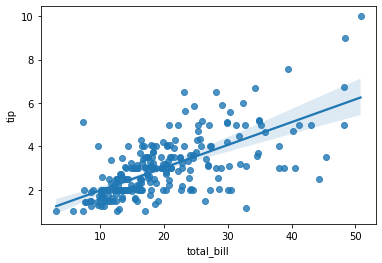

In [56]:
tips = sns.load_dataset('tips')
sns.regplot(x='total_bill', y='tip', data=tips)

In [97]:
# We load in the dataset
tips = sns.load_dataset('tips')

def cost_function(m, b, x, y):
    cost = np.mean((y - (m*x + b))**2)
    return cost

# Define partial derivatives of cost function
def partial_m(m, b, x, y):
    N = len(x)
    dm = (-2 / N) * np.sum(x * (y - (m * x + b)))
    return dm

def partial_b(m, b, x, y):
    N = len(x)
    db = (-2 / N) * np.sum(y - (m * x + b))
    return db

cost_function(m_test, b_test, x_test, y_test)

417.2322782786883

In [57]:
x_test = tips['total_bill']
y_test = tips['tip']
m_test = 1
b_test = 2


In [123]:
def gradient_step_v2(m, b, x, y, learning_rate) -> Tuple[float, float]:

    gradient_m = partial_m(m, b, x, y)
    gradient_b = partial_b(m, b, x, y)

    return (m - learning_rate * gradient_m, b - learning_rate * gradient_b)


(0.600935, 0.501134)

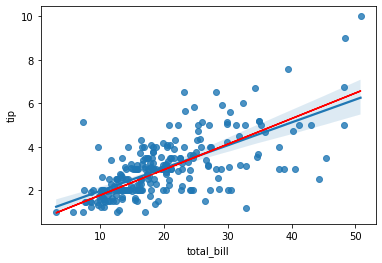

In [124]:
# Fit line using gradient descent
# Fill in the function below, which is similar to the function before, except that we are now working with different
# functions for the cost function and partial derivatives.


def gradient_descent_tips(x, y, learning_rate, max_num_steps):
    # Initialize slope and intercept
    m, b = 0.1, 0.6
    # Initialize step counter
    step = 0
    
    # Return best estimates of m and b
    for _ in range(max_num_steps):
        f1 = cost_function(m,b,x,y)
        
        m, b = gradient_step_v2(m, b, x, y, learning_rate)
        
        f2 = cost_function(m,b,x,y)
        
        step += 1
        
        if f2 > f1:
            break

        return m, b
    
m, b = gradient_descent_tips(tips['total_bill'], tips['tip'], 0.001, 1000)

# Plot scatterplot with regression line and gradient descent line
sns.regplot(x='total_bill', y='tip', data=tips)
plt.plot(tips['total_bill'], m*tips['total_bill']+b, color='red')
plt.show()

In [125]:
m, b = gradient_descent_tips(tips['total_bill'], tips['tip'], 0.001, 1000)
assert np.allclose(np.shape(m), 1)

<a id="linreg1" />

# Q2 Cost function for linear regression

* Recall the loss/cost function given for linear regression.
1.  Often you see it written as not the mean squared error, but half of the mean squared error. Explain in two-three sentences the difference and what the influence of taking the half is.
2. Again look at the `tips` dataset with one explanatory variable `total_bill`. Investigate the influence of the few "high bill" datapoints on the regression line. Think about the meaning of taking the square of the error. 
    * Your investigation will take the form a table, with for each of the thresholds we have defined the corresponding optimal coefficient `a` and `b`. It is also nice to plot the lines with these coefficients over the original data, to see the differences.
    * Also try to use what we learned on confidence intervals to estimate something on the significance on the observed differences in the regression lines.

HINT: You are allowed to use the `LinearRegression` function from sklearn for this exercise. Also, don't round the coefficients, just leave them like they come out of the `LinearRegressor` function. Check the documentation for the function to see how you can get the coefficient and intercept parameters that you want out of it.

YOUR ANSWER HERE

In [ ]:
tips = sns.load_dataset('tips')
sns.regplot(x='total_bill', y='tip', data=tips,  label='full fit');

# It is convenient to iterate over a list of thresholds that truncate the data
# You should perform Linear Regression on each of the truncated datasets and put your results in the 
# variable `threshold_table`, with the column names 'coefficient' and 'intercept'.

thresholds = [25, 30, 35, 40, 45]
threshold_table = pd.DataFrame()
threshold_table.index = thresholds
threshold_table['coefficient'] = 0.0
threshold_table['intercept'] = 0.0

for threshold in thresholds:
    #WRITE YOUR CODE HERE

# If we want to plot this, we should define a range of x values to plot this for.
x = np.arange(0, 50)

sns.scatterplot(x="total_bill", y="tip", data=tips)
for threshold in thresholds:
    coefficient = threshold_table.loc[threshold, 'coefficient']
    intercept = threshold_table.loc[threshold, 'intercept']
    sns.lineplot(x=x, y=x*coefficient+intercept, label=threshold)

In [ ]:
assert_equal(threshold_table.shape, (5, 2))

Now that we have experimented a bit with the loss function for linear regression we are going to do some experiments on the (hopefully) familiar `titanic` dataset.

<a id="linreg_intro" />

# Titanic


## P1 standardization

* Load the titanic dataset.
* Impute the age variable, motivate your choice.
* Split the dataset into a train and test set, use a 70/30 split.
* Now use lineair regression to predict survived from the other numeric variables (visible in the `t.describe()` output). Output the regression weights, and compute Rsquare and RMSE. Just use all numeric columns here (there are 5) although the pclass variable is really a categorical variable.

For this question it is OK to use the `LinearRegressionModel` from scikit-learn and the `train_test_split` function as well.


In [127]:
titanic=sns.load_dataset('titanic')
print(titanic.shape)
print(titanic.head())
titanic.describe()

(891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [145]:
from sklearn.impute import SimpleImputer
target = titanic['age']
imp = SimpleImputer(strategy='median')
target_reshaped = target.values.reshape(-1, 1)
imp.fit(target_reshaped)
target_variable_imputed = imp.transform(target_reshaped)
titanic['age'] = target_variable_imputed

In [172]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error


titanic = sns.load_dataset('titanic')
target = titanic['age']
imp = SimpleImputer(strategy='median')
target_reshaped = target.values.reshape(-1, 1)
imp.fit(target_reshaped)
target_variable_imputed = imp.transform(target_reshaped)
titanic['age'] = target_variable_imputed

# Split the data into test and train datasets, select variables which we do not need to preprocess 
# Use linear regression to predict survived 

X = titanic.drop(["survived", "sex", "embarked", "class", "who", "adult_male", "deck", "embark_town", "alive", "alone"], axis=1)
y = titanic["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.7)

reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)
pred = [round(i) for i in pred]

# Compute R-squared and RMSE
r2 = r2_score(y_test, pred)

rmse = pow(mean_squared_error(y_test, pred),0.5)
#WRITE YOUR CODE HERE
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

R-squared: -0.19167605383292807
RMSE: 0.5290092118939487


In [173]:
assert X_train.shape == (623, 5)
assert X_test.shape == (268, 5)
assert y_train.shape == (623,)
assert y_test.shape == (268,)


* Now z-transform all explanatory variables and do the same. For this exercise, fit the scalar on the train data and use it to transform both the train and test sets.
* Describe what you observe and what you may learn from this exercise.

In [181]:
from sklearn.preprocessing import StandardScaler

# Use the StandardScaler class from scikit-learn to z-transform the explanatory variables:
#WRITE YOUR CODE HERE

#WRITE YOUR CODE HERE
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg = LinearRegression().fit(X_train_scaled, y_train)
pred = reg.predict(X_test_scaled)
pred = [round(i) for i in pred]

# Get predictions on the survived, then compute R-squared and RMSE
r2_scaled = r2_score(y_test, pred)
rmse_scaled = pow(mean_squared_error(y_test, pred),0.5)
#WRITE YOUR CODE HERE
print(f"R-squared (scaled): {r2_scaled}")
print(f"RMSE (scaled): {rmse_scaled}")

R-squared (scaled): -0.19167605383292807
RMSE (scaled): 0.5290092118939487


In [182]:
assert X_train_scaled.shape == (623, 5)
assert X_test_scaled.shape == (268, 5)


<a id="crossval" />

For the next two questions, we are going to be working with our scaled data!

## P2 cross validation
Instead of dividing our dataset in a train and test set, we are going to do 5 fold cross validation with our scaled data, and report the values that we got for this.

* Now just take the whole dataset and implement 5 fold cross validation yourself using sklearn.
* Then do a linear regression 5 times on the obtained train-test fold splits.
* Plot the found evaluation values, and compute the mean and std.


In [185]:
#We will use the KFold function from sklearn
from sklearn.model_selection import KFold


kf = KFold(n_splits=5, shuffle=True, random_state=42) # don't change the random state

#create lists to store scores for r2 and rsme, split the data as usual, predict survival 
#as before with linear regression, compute our r2 and rsme and append these to lists, plot in your own way.
r2_scores = []
rmse_scores = []

# Iterate over each fold
for train_index, test_index in kf.split(titanic):
    print(train_index)

[  0   1   2   3   4   6   7   8   9  11  12  13  14  15  16  17  18  19
  20  21  22  24  26  27  28  29  32  34  35  36  37  38  40  41  42  43
  45  46  47  48  50  51  52  53  55  56  57  58  59  60  61  62  64  68
  69  71  73  74  75  79  80  81  83  85  87  88  89  90  91  92  93  94
  95  98  99 100 101 102 103 104 105 106 107 108 111 112 113 114 115 116
 117 118 119 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 138 140 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 166 167 169 170 171 172 173 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 193 194 195 197 199
 200 201 202 203 205 206 207 212 214 216 217 219 220 221 222 223 224 225
 226 228 229 230 232 233 234 236 237 238 239 240 241 242 243 245 246 247
 248 249 251 252 253 255 256 257 258 259 260 261 262 263 264 265 267 268
 269 270 271 272 273 274 276 277 278 279 282 283 284 285 287 288 289 293
 295 297 298 301 302 303 304 305 307 308 310 313 31

In [ ]:
assert np.allclose(np.shape(r2_scores), (5,))
assert np.allclose(np.shape(rmse_scores), (5,))


<a id="gridsearch" />

## P3 Grid search

* Split titanic into train, validation, test using a 60/20/20 split for train, validation and test respectively.
* Use the validation set to find optimal values for the regularization parameter, and the choice between lasso and ridge.
* You are not allowed to use the `GridSearchCV` function, as this does not really do what we want, so
we will be implementing it from scratch ourselves. We have already given you a list with three options for the regularization that you should use.
* Use the r2 score to measure how well a particular setting works, and save this in a dictionary `results` with as keys `lasso` and `ridge` and as values the values for the regularization parameter in the order given in the list of possible values.

HINT: sklearn does not have a function to directly split a dataset into train, validation and test, but you can use `train_test_split` twice, once to create separate train and test sets, and then once more to split the train set into a train and validation portion.



In [ ]:
# Use these functions for Lasso and Ridge
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import f1_score

# Split data into training, validation, and test sets (remember to scale features!)
#WRITE YOUR CODE HERE

# Define hyperparameters for grid search
alpha_options = [0.1, 1.0, 10.0]

# Perform grid search using train to the normalized train to train a model
# reporting the validation r2 in the table, calculated on the validation set. 
# you can use the `r2_score` from sklearn to calculate the rqaured error
results = {'ridge': [], 'lasso': []}

for alpha_option in alpha_options:
    #WRITE YOUR CODE HERE
scores_dataframe = pd.DataFrame(results)
scores_dataframe.index = alpha_options

In [ ]:
assert X_train.shape == (534, 5)
assert y_train.shape == (534,)
assert X_val.shape == (178, 5)
assert y_val.shape == (178,)
assert X_test.shape == (179, 5)
assert y_test.shape == (179,)



* After having done this on the validaion set, run all of these possibilities on the test set. 
* Think, display, and write a conclusion and what you have learned. 
* You can reuse most of the code from above to do this, 

In [ ]:
# Define hyperparameters for grid search
alpha_options = [0.1, 1.0, 10.0]

# Perform grid search using train to the normalized train to train a model
# reporting the test r2 in the table, calculated on the test set. 
# you can use the `r2_score` from sklearn to calculate the rqaured error
test_results = {'ridge': [], 'lasso': []}

for alpha_option in alpha_options:
    #WRITE YOUR CODE HERE
test_scores_dataframe = pd.DataFrame(test_results)
test_scores_dataframe.index = alpha_options

In [ ]:
#WRITE YOUR CODE HERE